## NLP
언어는 이미지나 다른 데이터와 달리 숫자화되어 있찌 않은 데이터이다. 따라서 먼저 **언어를 숫자화 시키는 word embedding**과정이 필요하다.

언어와 같이 순차적인 데이터를 학습하는 RNN모델, RNN모델을 개선한 LSTM모델, GRU 모델을 살펴볼 것. 

### __1.자연어 처리과정__ <br>
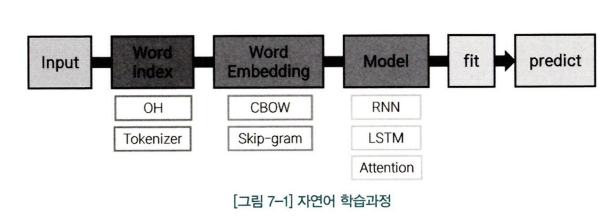 <br>

**Word index** : 언어를 벡터로 만들어야 한다. 따라서 word index로 단어에 index를 붙인다. 이렇게 함으로써 단어를 one-hot encoding을 통해 one-hot 벡터로 만들 수 있다.


**Word Embedding** : 언어를 학습시키기 위해서는 컴퓨터가 인식할 수 있도록 먼저 언어를 숫자로 표현해야 한다. Word Embedding기법에는 **CBOW, skip-gram** 등이 있다. word index에서 만든 one-hot 벡터를 단어의 의미와 맥락을 반영해 word embedding으로 복잡한 형태지만 훨씬 짧은 벡터로 표현.


**RNN, LSTM, Attention** : 자연어나, 시계열 등 순서가 있는 데이터를 sequence 데이터라 하며, 자연어 처리 과정은 기본적으로 **seq2seq 모델** 을 따른다. 
    - seq2seq 모델은 입력 부분인 Encoding부분과 출력부분인 Decoding부분으로 이루어져 있으며, 두 부분을 연결해는 것이 context 벡터다. 
    - input -> `encoding` -> `context` -> `decoding` -> output 


### __2. 단어를 벡터로 Word Embedding__ <br>

__word embedding하는 이유__ <br>
단어를 벡터로 나타내는 가장 간단한 방법은 단어 하나에 벡터 하나를 매핑시키는 것이다. 이때 사용하는 벡터가 복잡해지면 단어 사이의 계산이 복잡해지므로 one-hot 벡터를 사용한다.

단어 수가 더 많아지면 더 큰 차원이 필요하기에 비효율적인 방법이며 단어와 단어 사이의 상관관계는 전혀 반영되지 않는다. 단어에 index를 붙어 순서를 정하면 바로 one-hot 벡터에 매핑할 수 있다.
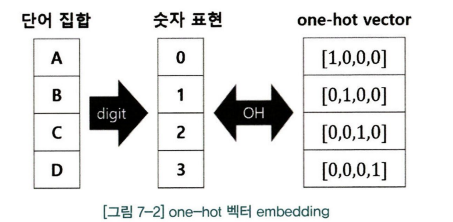

__word embedding방법__ <br>
단어에 번호를 매기면 된다. 번호를 매길때는 우선 단어를 나열해야하는데, 사용 순서대로 나열하는 방법도 있고, 가장 많이 사용한 순서대로 나열하는 방법도 있다. 순서가 정해지면 바로 one-hot 벡터로 변환이 가능하다. `one-hot 벡터는 단지 번호를 매긴 것뿐이므로 단어의 의미나 단어 사이의 상관관계는 전혀 알 수 없다.-> 따라서 Word Embedding을 사용해 단어와 단어 사이의 상관관계를 나타낸다.` 

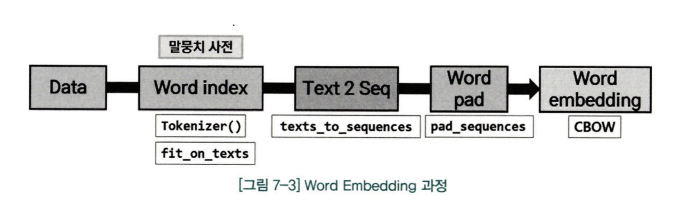

- Tokenizer() : 단어를 나열해 word index 생성 <br>
- text_to_sequence : word index(Vector)를 이용해 문장을 벡터로 만들기 <br>
- word pad : 입력 데이터의 크기를 일괄적으로 맞춰줌 <br>
- word embedding : 맥락이 있는 벡터로 바꿔줌.  <br>
    - one hot 벡터와 word embedding 벡터와의 차이점: <br>
        1. one hot 벡터는 0,1만 사용하는 반면 word embedding 벡터는 실수를 사용한다. 따라서 훨씬 적은 차원으로 단어 표현이 가능하다. <br>
        2. embedding 벡터는 단어들의 상관관계도 같이 학습된다. <br>

__CBOW 모델 : Continuous Bag of Words__ <br>
단어들 사이의 상관관계는 어떻게 알 수 있을까? `CBOW에서는 한 문장에 같이 등장하는 단어라면 상관관계가 있다`는 것에서 출발

한 문장에 있는 단어들끼리는 상관관계가 있다는 전제하에 한 문장에 있는 단어를 차례대로 중심 단어로 설정하고 주변단어를 연결하는 방식으로 학습. 중심 단어에서 좌우 주변 단어를 몇 개를 연계시킬지를 나타내는 것이 `window`이다. window가 1이면 좌우 한 단어씩, 총 두 단어를 연계시키며, window가 2이면 좌우 두 단어씩, 총 네 단어를 연계시키는 방법이다. 

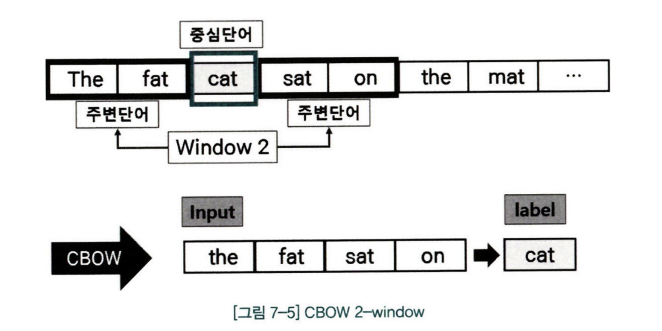

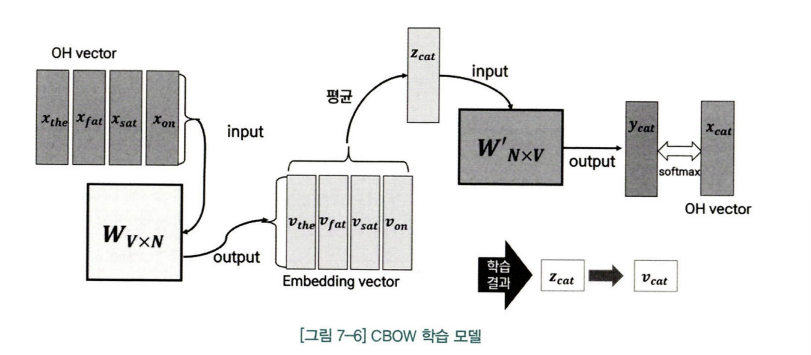

- Input Layer: <br>
    - 주변 단어 the, fat, sat, on 을 one-hot 벡터로 입력. <br>
- Hidden Layer: <br>
    - 가중치 행럴(w) 곱해 얻은 벡터들을 평균내어 하나의 벡터로 만들기 <br>
    (= 문맥 단어들의 의미를 종합적으로 표현하는 벡터) <br>
    (= 중심단어 cat의 잠정적인 embedding 벡터로 추정.) <br>

- Output Layer: <br>
    - 이 추정 벡터를 다시 행렬(w')에 곱해 다시 one-hot 벡터로 만들기. <br>
        - 왜 다시 가중치 행렬을 곱하는 이유는, hidden layer에서 얻은 벡터는 문맥을 기반으로 중심단어의 의미를 담아낸 것이기 때문에 직접적인 특정 단어를 예측할 수 없다. 따라서 다시 가중치 행렬과 곱한다. 즉, 이 가중치 행렬은 은닉층의 벡터를 전체 단어장의 크기를 가진 벡터로 변환하는 역할을 한다. <br>

- back propagation <br>
    - output 층에서는 변환된 벡터를 사용하여 `각 단어가 중심단어일 가능성에 대한 확률 분포를 계산`. 이를 위해 소프트맥수 함수를 적용해, 모든 단어에 대해 중심단어가 될 확률을 출력.
    - 중심단어 cat의 one-hot 벡터와 비교해 손실(cross-entropy loss) 계산. 이를 기반으로 가중치가 조정되며, 이 과정을 통해 모델은 점차 문맥으로부터 중심단어를 예측하는 방법을 학습한다. 


__Skip-Gram 모델__ <br>
CBOW는 주변 단어에서 중심단어를 예측하는 모델인 반면, skip-gram은 중심단어에서 주변단어를 예측하는 모델. CBOW와 skip-gram 모델의 학습과정은 이전의 학습과정과는 조금 다른데, 결과값이 아닌 가중치 행렬이 결국 모델의 최종 목적인 Embedding 벡터가 된다. 이러한 Word Embedding 기법으로 단어들 사이의 상관관계까지 표현된 Embedding 벡터를 얻을 수 있게 된다. 

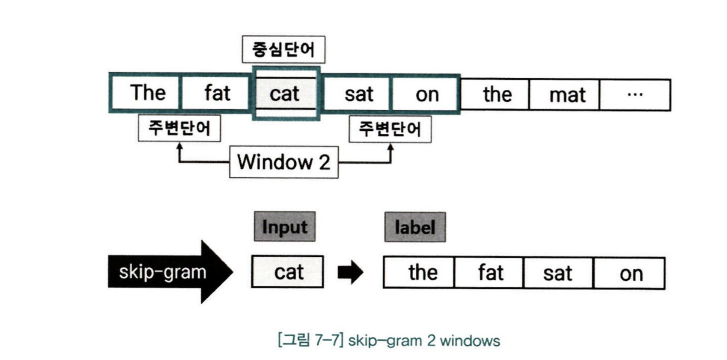

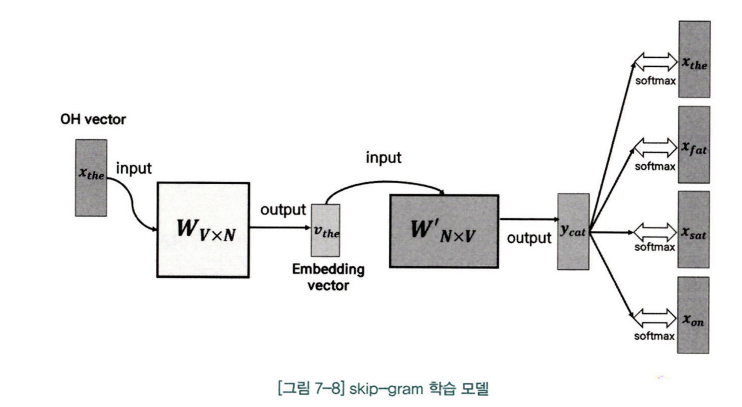

- Input Layer :  <br>
    - 중심단어 cat이 one-hot 벡터로 입력. <br>
- Hidden Layer :
    - 가중치 행렬과 곱해져 단어의 분산을 표현(dense vector) <br>
- Output Layer : <br>
    - 은닉층으로부터 얻은 벡터는 다시 한법 가중치 행렬과 곱해져 각 문맥 단어를 예측. 출력층에서는 소프트맥스 함수를 사용해 `각 단어가 특정 문맥에서 등장할 확률을 계산`. 모델의 목표는 이 확률들을 최대화 하는 것.  <br>
    - 이 벡터들은 단어 간의 의미적 유사성을 반영. <br>
    - 예측과 실제 문맥 단어 사이의 오차를 최소화하기 위해 모델의 가중치 조절. <br>


### __3. Sequence를 다루는 모델__ <br>

__1) Sequence 데이터?__<br>
- **sequence 데이터**는 순서가 있는 데이터(시계열, 자연어 데이터)이며, 순서대로 나열한 것이 **수열(sequence)**이다. sequence 데이터는 순서에 따라 데이터들 간에 일정한 규칙이 있으며, 이러한 규칙을 나타낸 것을 **점화식(recurrence relation)**이라 한다. 


__2) RNN모델 (Recurrence Neural Networks)__<br>
- 입력받은 sequence 데이터를 점화식으로 연결해 학습시키는 모델. 신경망 모델을 기본으로 하여 만들어짐.

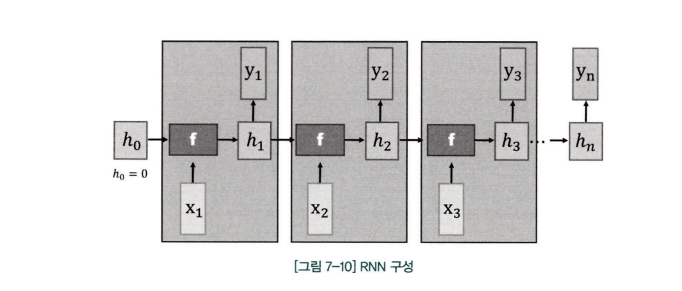

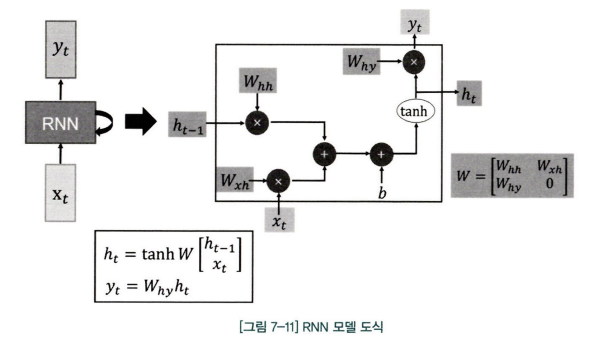

1. input에 $x_t$ 데이터 입력. <br>
2. `이전단계에서 계산한 벡터 $h_(t-1)$ 을 입력받아` 선형모델로 처리.<br>
3. 활성화 함수 tanh을 이용해 다음단계 hidden 벡터 h_t를 출력.<br>

- 보통의 신경망은 단순한 one-to-one 모델인 반면, RNN모델은 다양한 형태의 입출력이 가능. <br>

- RNN 모델의 학습은 sequence 데이터를 차례로 하나씩 입력받으면서 그 출력을 hidden 벡터를 만들어서 다음 단계로 넘겨준다. <br>

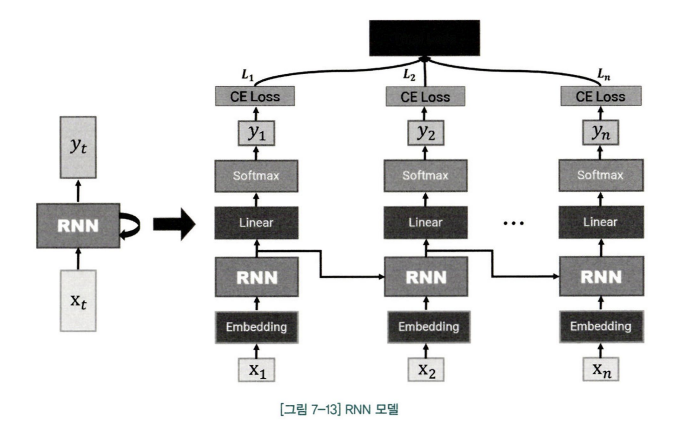 <br>

- RNN 모델의 단점 : 입력 sequence 만큼 hidden 벡터가 만들어지고 지속적인 정보 전달이 이루어진다. 하지만 항이 길어질수록 미분 계산이 복잡해지고 정보 전달 과정에도 문제가 생긴다. 이러한 RNN 모델의 단점은 `미분소실 또는 폭주 문제와 정보전달 문제인 Long Term Dependency 문제`로 분류된다. <br>
    - 1) 미분소실 또는 폭주 문제 Truncated BPTT <br>
        - RNN 모델에서 시간 순서에 따른 오류 역전파를 BPTT(BackkPropagation Through Time)이라 한다. sequence가 길어지면 BPTT에서 미분 소실 또는 폭주가 일어날 가능성이 높아진다. <br>
        - 예를 들어, 입력 sequence 길이가 10이고, 각 과정의 미분값이 0.1이라 한다면, 전체과정에서의 미분값은 0.1의 10승이 되어 거의 0이된다. 반대로 미분값이 2이면 전체 과정의 미분값은 2의 10승이 되어 1000이 넘게 된다. 이처럼 전파가 길어지면 값이 소실 또는 폭주할 가능성이 높아지기 때문에 오류 역전파 계산 시 몇 개 항만 잘라 계산을 한다. 보통 5개의 항을 사용하며, 이것을 생략된 BPTT라고 한다. <br>

    - 2) 정보 전달 문제 Long Term Dependency <br>
        - RNN 모델에서는 sequence 항이 길어지면 처음에 입력된 정보가 뒤로 갈수록 다른 정보와 취합되어 전달력이 약해진다. 이런 현상을 장기 의존성(Long Term Dependency) 문제라 한다.


__3) LSTM모델__ <br>
- RNN 모델의 단점을 보완해 개발된 것이 LSTM 모델이다. LSTM모델은 `forget gate, input gate, update gate, output gate` 4개의 gate로 이루어져 있다. <br>

- 각 단게에서 LSTM 모델의 입력은 RNN 모델과 같이 sequence 데이터 $x_t$와 이전 단계에서 넘어온 hidden 벡터 $h_t$ 이다. 이후, 가중치 행렬 $W$를 곱하는 것까지는 RNN 모델과 동일하지만, 활성화를 4가지 단계로 나누어서 진행하는 것에 차이가 있다. <br>

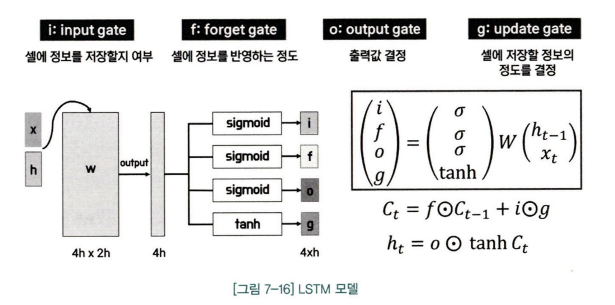

- (a) forget gate layer<br>
    - 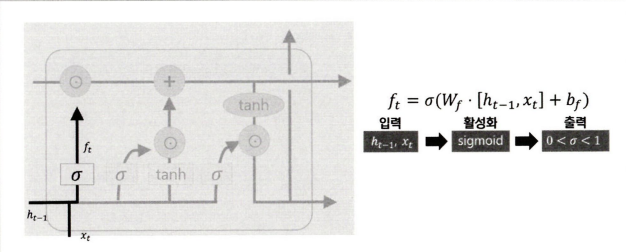<br>
    - 1. 이전 단계에서 전달된 hidden 벡터 $h_(t-1)$와 새로운 입력 벡터 $x_t$를 가중치 행렬에 곱한다.<br>
    - 2. sigmoid 활성화 함수로 0~1사이의 값을 출력<br>
    - 3. 만약에 0이면 연관성이 없는 것(forget), 1이면 연관성이 큰 것<br>
    - 즉, 셀 상태에서 어떤 정보를 제거할 것인지 결정. forget gate는 이전 상태에서 불필요하게 된 정보를 잊어버리게 해줌으로써 새로운 정보를 저장할 공간을 확보하고, 오래된 정보가 현재 상태의 예측에 불필요한 영향을 미치는 것을 방지. <br>

- (b) input gate layer <br>
    - 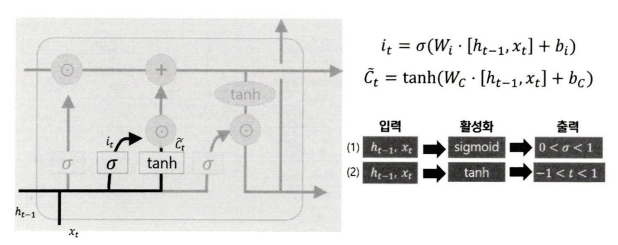  <br>
    - (1) 이전단계에서 전달되어 온 hidden 벡터 h_(t-1)와 새로운 입력 벡터 x_t를 가중치 행렬에 곱하고 `sigmoid 함수로 활성화해 0~1 사이의 값`을 출력. (-> 정보의 강도를 결정) <br>
    - (2) hidden 벡터 h_(t-1)와 새로운 입력 벡터 x_t를 가중치 행렬과 곱하고 `tanh 함수로 활성화해 -1~1사이의 값`을 출력하는 것(=update gate) (-> 음수면 흐름에 반한다는 의미, 양수면 흐름에 부합한다는 것) <br>
    - 이 두 과정의 결과를 Hadamard product로 계산한 것이 input gate layer다. <br>
    - input gate 안에 forget gate가 있는 것은 아님!!!! 따로 작동되는 것임!!! - 만약 forget gate에서의 시그모이드 값이 0에 가까울 경우 이전 상태의 정보를 많이 잊게 되고, 1에 가까울 경우 이전 상태의 정보를 많이 기억하게 됩니다. 이후 input gate에서 1에 가까운 시그모이드 값과 새로운 후보 값(tanh의 출력)을 곱한 후, 이를 이전 상태의 정보에 더합니다. 결과적으로 LSTM 셀은 이전 상태의 정보를 얼마나 유지하고, 새로운 정보를 얼마나 통합할지를 결정하게 됩니다. <br>

- (c) Cell state <br>
    - 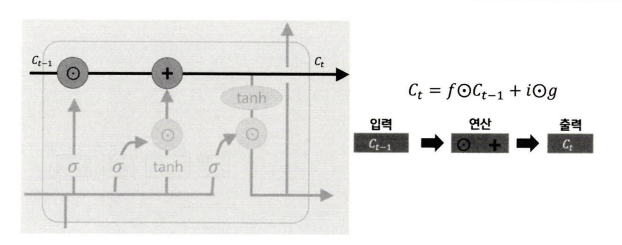 <br>
    - forget gate layer에서 계산된 값과 이전 cell state 값을 Hadamard product 로 계산하고, input gate layer에서 전달되어 온 값을 더해 다음 항의 값을 얻는다. <br>
    - 이 cell state는 LSTM 모델을 역전파로 미분할 때 실제 계산되는 항이며, 단순한 곱셈과 덧셈으로 이루어진 LSTM 모델의 핵심과정이다. 

- (d) output gate layer <br>
    - 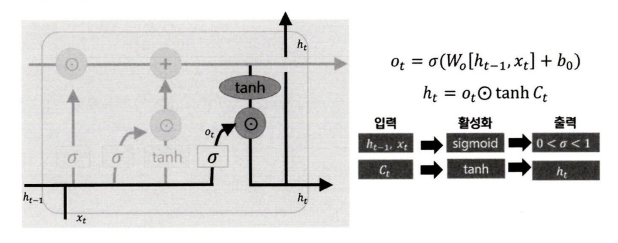 <br>
    - 이전 단계에서 전달되어 온 hidden 벡터 $h_(t-1)$ 와 새로운 입력 벡터 $x_t$를 가중치 행렬에 곱한 후 sigmoid 함수로 활성화해 0~1 사이의 값을 출력하고, cell state 에서 계산된 tanh 함수로 활성화 해 -1~1 사이의 값을 출력한다. 이 두 결과값을 Hadamard product로 계산한 결과를 다음단계의 hidden 벡터로 넘겨준다. 결국 hidden 벡터의 값들은 -1~1사이가 된다. 


- LSTM 모델과 오류 역전파  <br>
    - 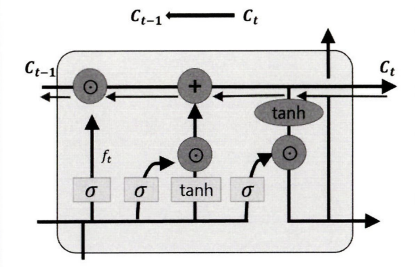  <br>
    - LSTM 모델은 입력된 데이터와 전달된 값들을 gate들을 통해 계산해 새로운 출력값을 만들어준다. 이 과정은 크게 두 개의 state로 나뉘는데, 하나는 RNN 모델에서와 같은 hidden 벡터이며, 다른 하나는 cell state 라 부르는 값이다. 오류 역전파를 계산할 때 이 cell state값만 계산하도록 설계되어 있다. <br>

__4) GRU 모델:Gated Recurrent Units__<br>
GRU 모델은 LSTM 모델을 단순화시킨 것이다. 2개였던 state를 하나로 줄이고, 4개였던 gate를 2개로 줄였다. `reset gate, update gate` 두개의 gate로 구성되어 있다.

- (a) 하나의 state <br>

- (b) Reset gate <br>
    - 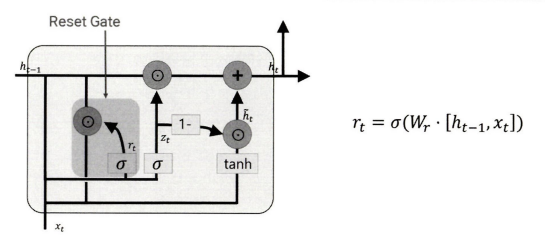 <br>
    - 이전단계에서 전달되어 온 hidden 벡터 $h_t$와 새로운 입력 벡터 $x_t$ 를 가중치 행렬에 곱한 후 sigmoid 함수로 활성화해 0~1 사이의 값을 출력. 전달할 정보의 강도를 설정해 출력을 조절하는 단계다. <br>

- (c) Update gate <br>
    - 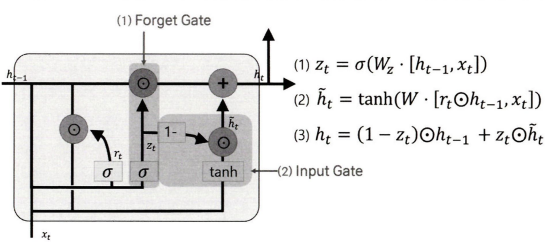  <br>
    - LSTM 모델의 forget gate와 input gate를 합쳐놓은 역할로 과거 정보와 현재 정보에서 반영할 비율을 결정.  <br>

- (d) Gate Controller  <br>
    - 하나의 gate controller가 forget gate와 input gate를 모두 제어한다. 출력값이 1이면 forget gate가 열리고 input gate가 닫히며, 출력값이 0이면 forget gate가 닫히고 input gate가 열린다.


### __4. Seq2Seq 모델__
many-to-many 형태로 입력도 sequence고 출력도 sequence인 모델을 seq2seq 모델이라 한다.  <br>
seq2seq모델은 입력 부분인 Encoder와 출력 부분인 Decoder로 구성되어 있으며 그 사이를 연결해주는 것을 context 벡터라 한다. 각각의 입출력 부분에 RNN 모델을 사용한다. <br>

Encoder부분과 Decoder 부분에 사용되는 모델은 sequence 데이터를 다루는 RNN모델(RNN, LSTM, GRU 등)을 사용한다. Encoder-Decoder 모델은 문장을 입력하면 그 결과로 다시 문장을 출력하는 방식이며 각각의 encoder부분과 decoder 부분에 사용되는 RNN 모델은 문장과 문장을 연결하는 방식이다. 하지만 최근에는 Attention Mechanism으로 입력 문장 내의 단어와 출력 문장 내의 단어를 직접 연결하는 방법이 사용되고 있다. <br>


__1) Encoder-Decoder 모델__  <br>
Encoder 부분은 many-to-one 형태로 주어진 모델로 문장을 하나의 sequence로 보아 RNN 모델로 처리해 최종 결과를 하나의 벡터(context 벡터)로 출력한다. <br>

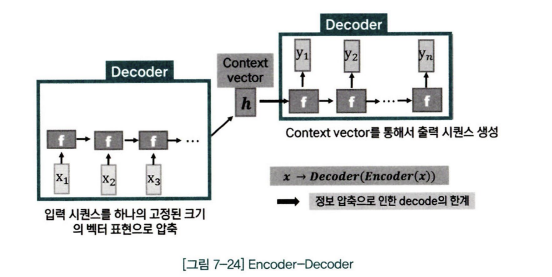 <br>

하지만 `Encoder에서 정보를 압축`해 `context 벡터`로 만들어 `Decoder로 해체`하는 방식은 압축으로 이미 소실된 정보가 있는 상태에서 해체하는 방식이므로 정보 전달력에 한계가 있다. 


__2) Attention Mechanism__ <br>
RNN 모델은 문장과 문장을 연결하는 방식이지만, Attention Mechanism은 단어와 단어를 연결하는 구조로 되어 있다. 단어와 단어를 연결하는 방법은 기존의 RNN 모델에서 context 벡터를 하나만 전달하는 것과는 달리 `입력 문장의 각 단어마다 context벡터를 생성`해 하나의 벡터가 아닌 벡터들의 묶음을 전달하는 방식이다.  <br>

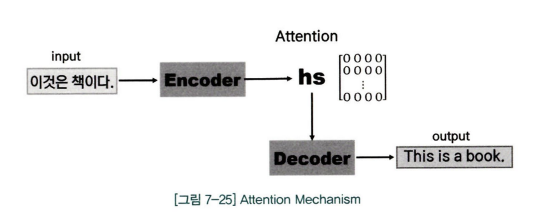

__3) Transformer 기법__ <br>
Transformer기법에서는 RNN 부분을 아예 제거하고 Attention Mechanism만을 사용해 모델을 만듦.<br>

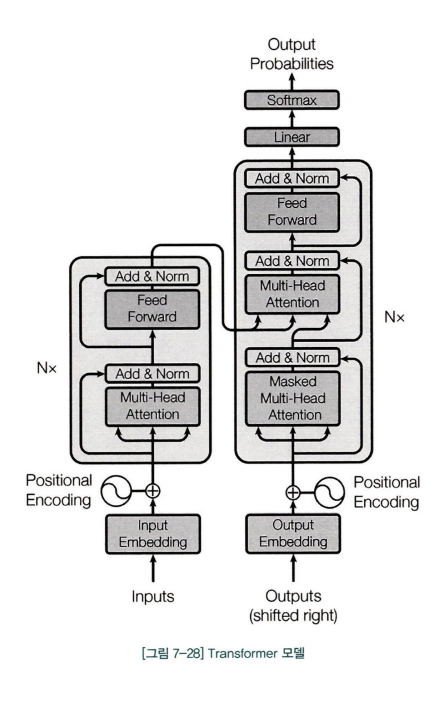

